In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import random
import pymc3 as pm
from pymc3 import  *
from sklearn.linear_model import SGDRegressor
import markovify

In [7]:
df_ks = pd.read_csv("/content/drive/MyDrive/ks-projects-201801.csv")

df_ks

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00


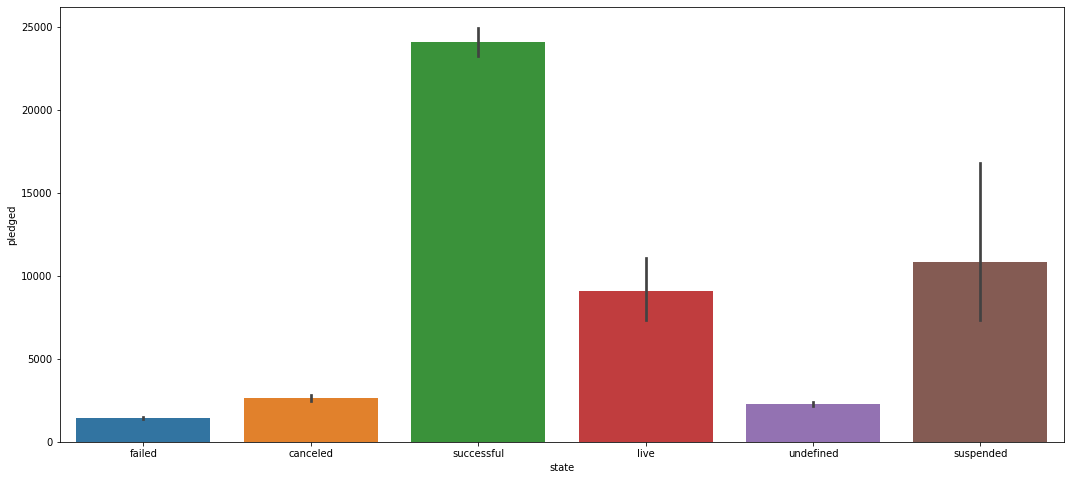

In [ ]:
fig = plt.gcf()

fig.set_size_inches(18, 8)

ax = sns.barplot(data=df_ks, x="state", y="pledged")

plt.show()

<Figure size 3168x1728 with 0 Axes>

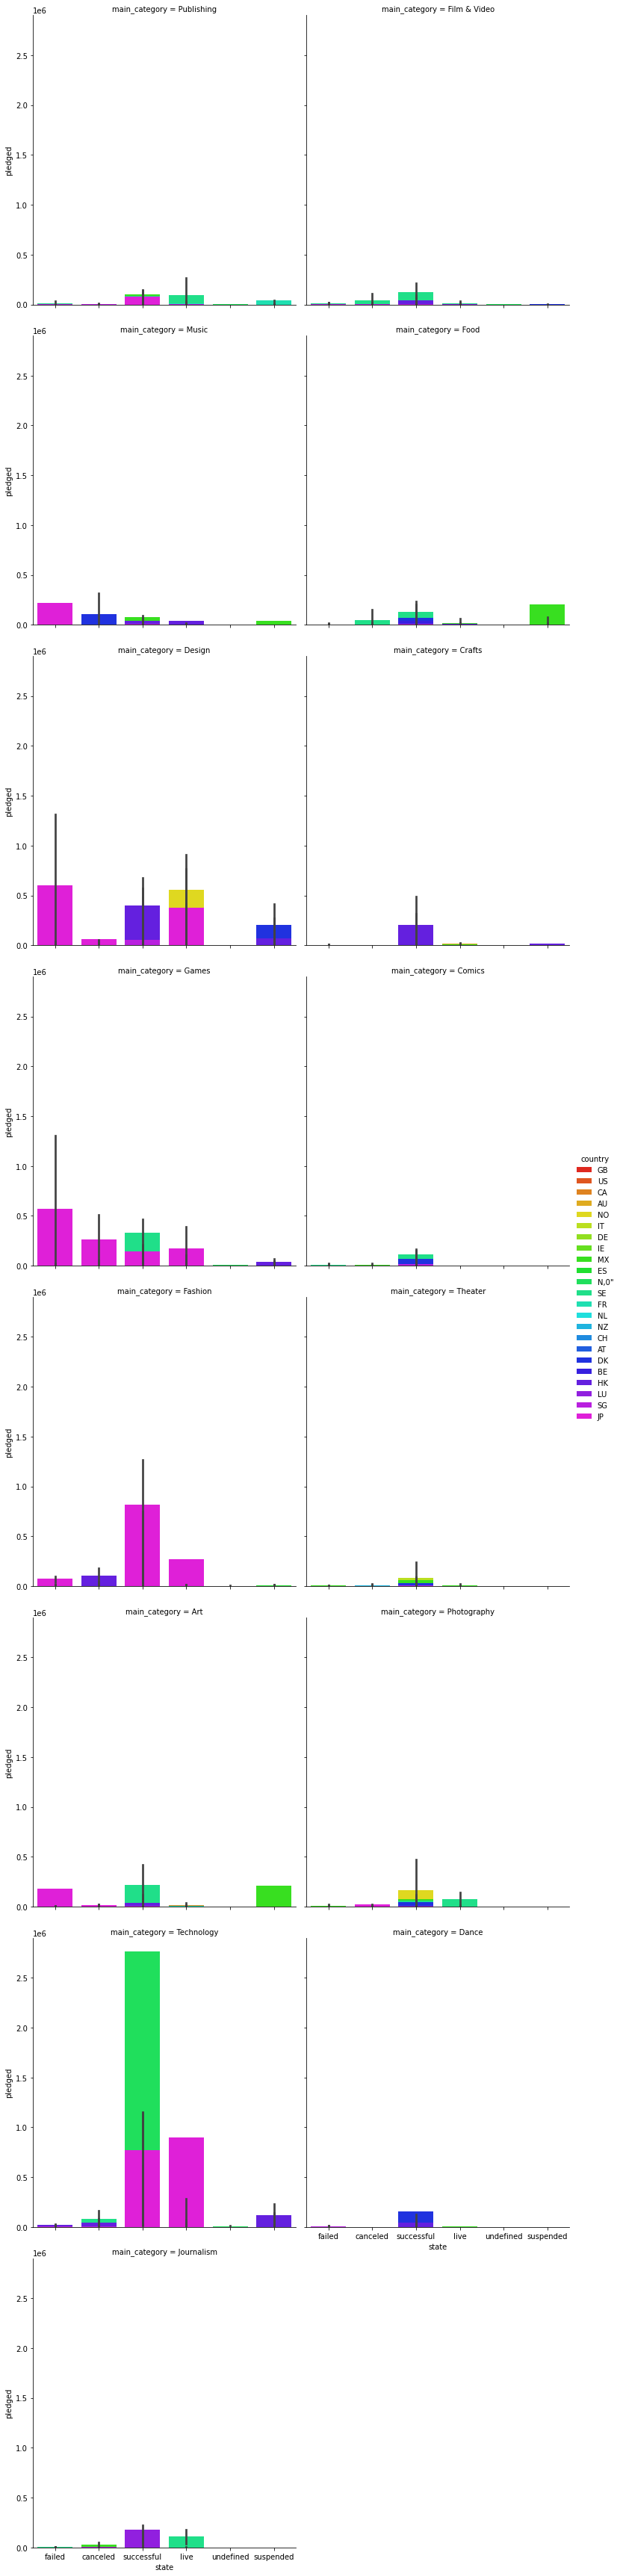

In [ ]:
fig = plt.gcf()

fig.set_size_inches(44, 24)
g = sns.FacetGrid(df_ks, col="main_category", hue="country", palette="gist_rainbow", col_wrap=2, height=6, aspect=0.9)
g.map(sns.barplot, "state", "pledged", order=df_ks["state"].unique())
g.add_legend()
plt.show()

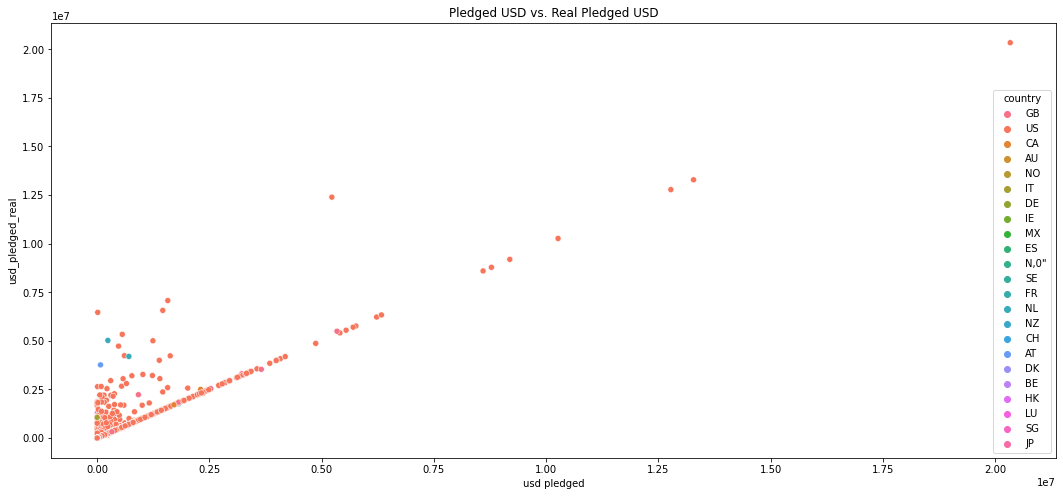

In [ ]:
fig = plt.gcf()

fig.set_size_inches(18, 8)

ax = sns.scatterplot(data=df_ks, x="usd pledged", y="usd_pledged_real", hue="country")

plt.title("Pledged USD vs. Real Pledged USD")

plt.show()

In [ ]:
df_canc = df_ks[df_ks['state'] == "canceled"]

df_canc["deadline"] = pd.to_datetime(df_canc["deadline"])
df_canc["launched"] = pd.to_datetime(df_canc["launched"])

days = []

for _, row in df_canc.iterrows():
  delta = pd.Timedelta(row["deadline"] - row["launched"]).days

  days.append(delta)


df_canc["launch_deadline_delta"] = days




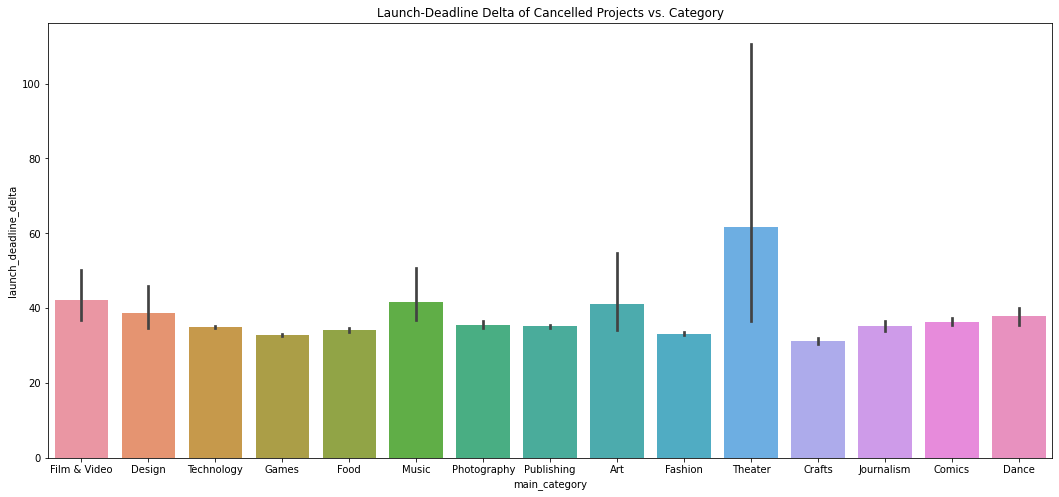

In [ ]:
fig = plt.gcf()

fig.set_size_inches(18, 8)

ax = sns.barplot(data=df_canc, x="main_category", y="launch_deadline_delta")

plt.title("Launch-Deadline Delta of Cancelled Projects vs. Category")

plt.show()

In [ ]:
df_canc = df_ks[df_ks['state'] != "canceled"]

df_canc["deadline"] = pd.to_datetime(df_canc["deadline"])
df_canc["launched"] = pd.to_datetime(df_canc["launched"])

days = []

for _, row in df_canc.iterrows():
  delta = pd.Timedelta(row["deadline"] - row["launched"]).days

  days.append(delta)


df_canc["launch_deadline_delta"] = days




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

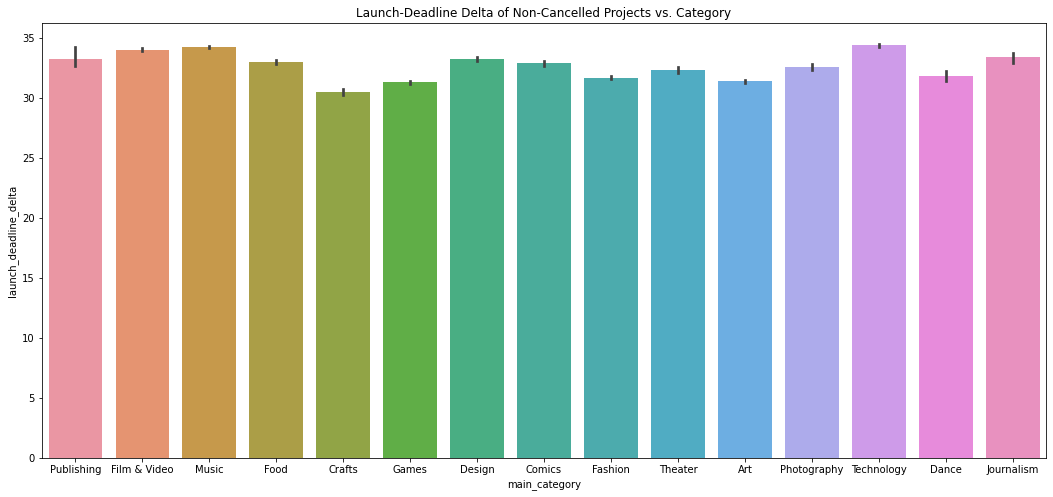

In [ ]:
fig = plt.gcf()

fig.set_size_inches(18, 8)

ax = sns.barplot(data=df_canc, x="main_category", y="launch_deadline_delta")

plt.title("Launch-Deadline Delta of Non-Cancelled Projects vs. Category")

plt.show()

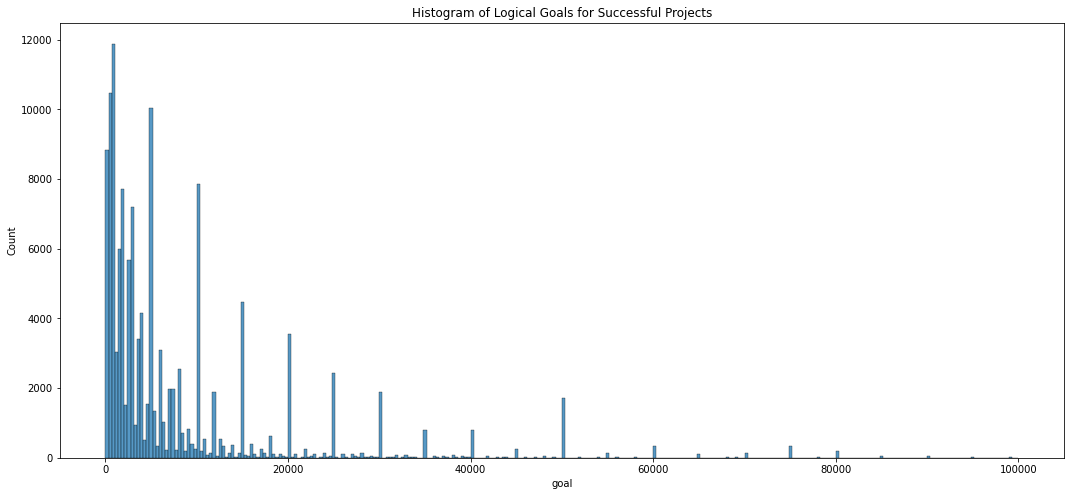

In [ ]:
df_succs = df_ks[(df_ks["state"] == "successful") & (df_ks["goal"] < 100000)]

fig = plt.gcf()

fig.set_size_inches(18, 8)

ax = sns.histplot(data=df_succs, x="goal")

plt.title("Histogram of Logical Goals for Successful Projects")

plt.show()

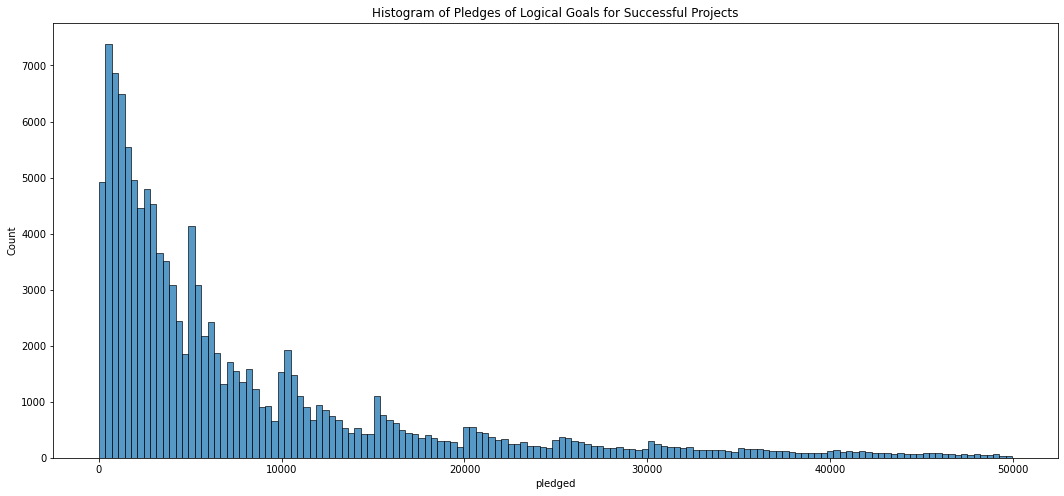

In [ ]:
df_succs = df_ks[(df_ks["state"] == "successful") & (df_ks["goal"] < 100000) & (df_ks["pledged"] < 50000)]

fig = plt.gcf()

fig.set_size_inches(18, 8)

ax = sns.histplot(data=df_succs, x="pledged")

plt.title("Histogram of Pledges of Logical Goals for Successful Projects")

plt.show()

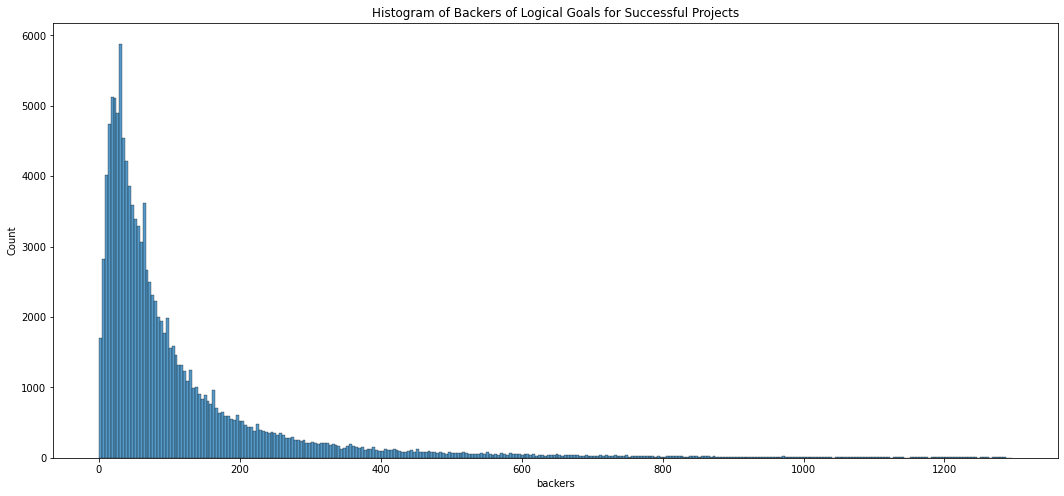

In [ ]:
df_succs = df_ks[(df_ks["state"] == "successful") & (df_ks["goal"] < 100000) & (df_ks["pledged"] < 50000) & (df_ks["backers"] < 1300)]

fig = plt.gcf()

fig.set_size_inches(18, 8)

ax = sns.histplot(data=df_succs, x="backers")

plt.title("Histogram of Backers of Logical Goals for Successful Projects")

plt.show()

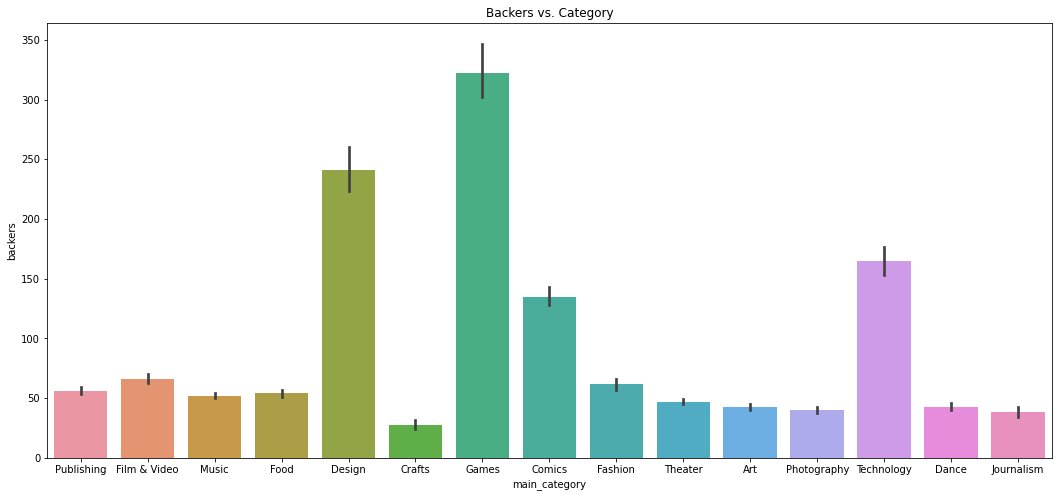

In [ ]:
fig = plt.gcf()

fig.set_size_inches(18, 8)

ax = sns.barplot(data=df_ks, x="main_category", y="backers")

plt.title("Backers vs. Category")

plt.show()

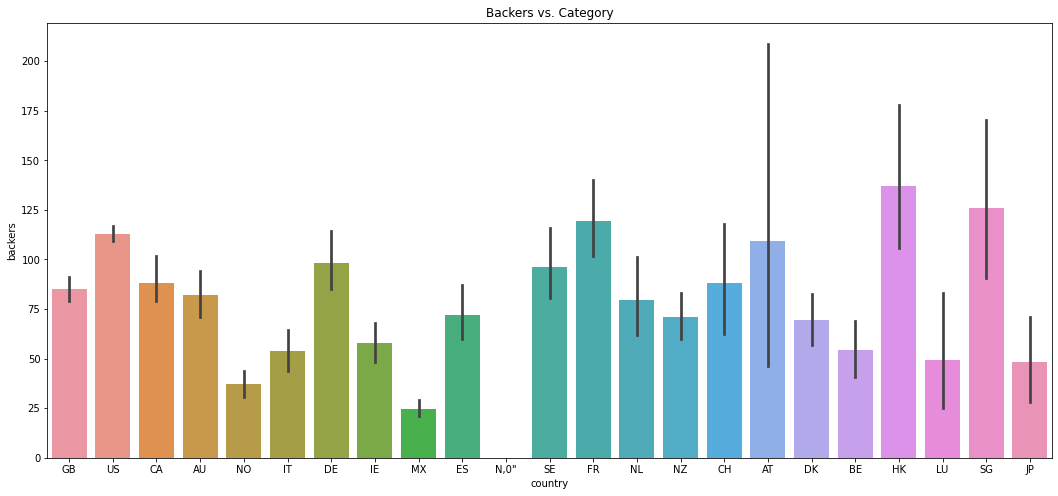

In [ ]:
fig = plt.gcf()

fig.set_size_inches(18, 8)

ax = sns.barplot(data=df_ks, x="country", y="backers")

plt.title("Backers vs. Category")

plt.show()

<Figure size 3168x1728 with 0 Axes>

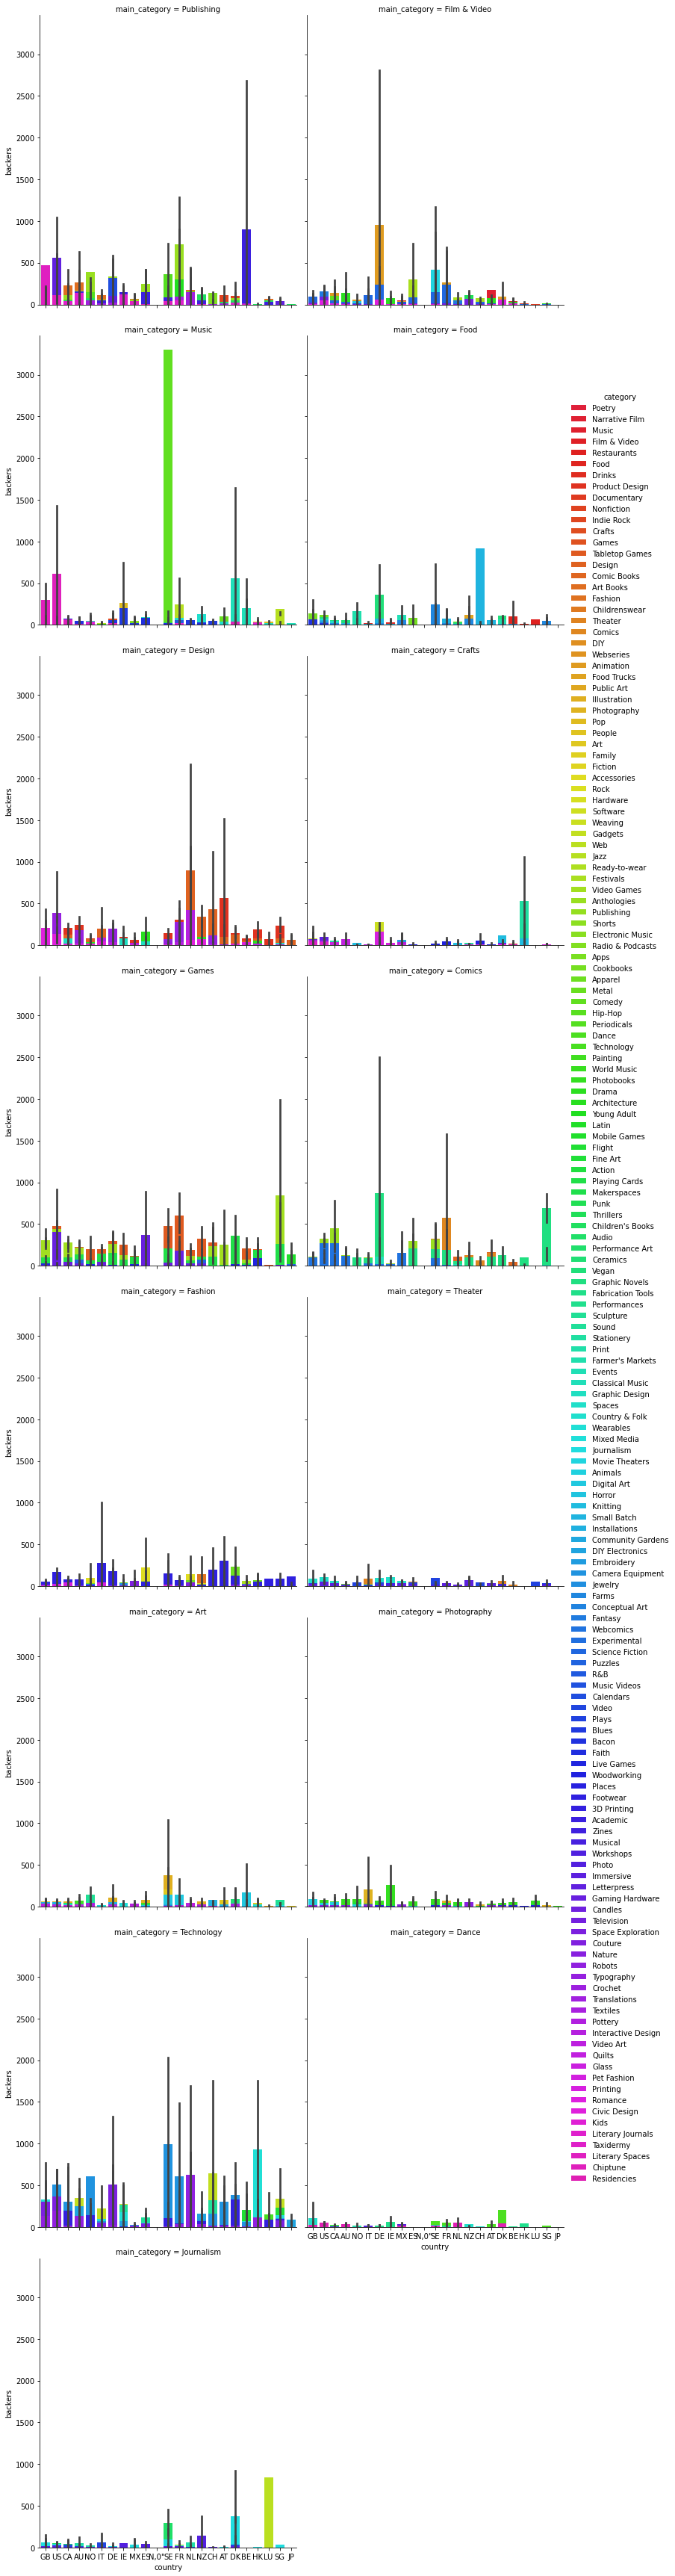

In [ ]:
fig = plt.gcf()

fig.set_size_inches(44, 24)
g = sns.FacetGrid(df_ks, col="main_category", hue="category", palette="gist_rainbow", col_wrap=2, height=6, aspect=0.9)
g.map(sns.barplot, "country", "backers", order=df_ks["country"].unique())
g.add_legend()
plt.show()

In [5]:
df_super = df_ks.loc[:, ["main_category", "backers", "pledged"]].dropna()
df_super_X = df_super.loc[:, ["main_category", "backers"]]
df_super_y = df_super.loc[:, "pledged"]

le_cat = LabelEncoder()

le_cat.fit(df_super_X["main_category"].values)
ss_backers = StandardScaler()
ss_pledged = StandardScaler()

ss_backers.fit(df_super_X["backers"].values.reshape(-1, 1))
ss_pledged.fit(df_super_y.values.reshape(-1, 1))

df_super_X["main_category"] = le_cat.transform(df_super_X["main_category"].values)
df_super_X["backers"] = ss_backers.transform(df_super_X["backers"].values.reshape(-1, 1))
df_super_y = ss_pledged.transform(df_super_y.values.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(df_super_X, df_super_y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(283995, 2) (94666, 2) (283995, 1) (94666, 1)


In [ ]:
estimator = RandomForestRegressor(random_state=420)
para_grids = {
            "n_estimators" : [10,50,100],
            "max_features" : ["auto", "log2", "sqrt"],
            "bootstrap"    : [True, False]
        }


grid = GridSearchCV(estimator, para_grids, scoring='neg_median_absolute_error')
grid.fit(X_train, y_train.ravel())
forest = grid.best_estimator_

reg_prediction=forest.predict(X_test)

print(grid.best_score_, grid.best_params_)

mae = mean_absolute_error(y_test, reg_prediction)

mae

-0.0055691281716550994 {'bootstrap': True, 'max_features': 'log2', 'n_estimators': 50}


0.07131254754275827

In [ ]:
estimator = AdaBoostRegressor()
para_grids = {
            "n_estimators" : [10,50,100],
            "loss" : ['linear', 'square', 'exponential'],
            "random_state" : [None, 10, 100]
        }


grid = GridSearchCV(estimator, para_grids, scoring='neg_median_absolute_error')
grid.fit(X_train, y_train.ravel())
ada = grid.best_estimator_

reg_prediction=ada.predict(X_test)

print(grid.best_score_, grid.best_params_)

mae = mean_absolute_error(y_test, reg_prediction)

mae

-0.04842437948761823 {'loss': 'square', 'n_estimators': 10, 'random_state': None}


0.09752022476119061

In [6]:
estimator = SGDRegressor()
para_grids = {
            "loss" : ['squared_loss',  'squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
            "penalty" : ['l2', 'l1', 'elasticnet'],
            "alpha" : [0.000001, 0.0001, 0.1],
            "random_state": [10, 100, 5000]
        }


grid = GridSearchCV(estimator, para_grids, scoring='neg_median_absolute_error')
grid.fit(X_train, y_train.ravel())
ada = grid.best_estimator_

reg_prediction=ada.predict(X_test)

print(grid.best_score_, grid.best_params_)

mae = mean_absolute_error(y_test, reg_prediction)

mae

-0.00666724045134245 {'alpha': 0.0001, 'loss': 'huber', 'penalty': 'elasticnet', 'random_state': 5000}


0.061993395443315384

In [26]:
 print(np.where(le_cat.classes_ == "Publishing"))
pred_backers = ss_backers.transform([[20]])
pred_backers

(array([12]),)


array([[-0.09437721]])

In [12]:
pledge_pred = ada.predict([[13, -0.09437721]])

ss_pledged.inverse_transform(pledge_pred)

array([2309.88959384])

In [14]:
random_backers = []

for i in range(100):
  random_backers.append(random.randint(10, 300))

rand_bck_ss = ss_backers.transform(np.array([random_backers]))

In [21]:
pledged = []

for backer in rand_bck_ss[0]:
  pred = ada.predict([[13, backer]])

  pledged.append(ss_pledged.inverse_transform(pred)[0])


pledged

[8203.871413170617,
 3783.38521200179,
 7142.954724890098,
 17928.941055742034,
 10325.704789731652,
 13095.876142464116,
 9913.12607762256,
 17752.12160769528,
 17752.12160769528,
 7260.834356921267,
 7496.593620983604,
 9913.12607762256,
 4019.144476064128,
 13626.334486604377,
 11622.380742074507,
 14569.371542853723,
 9264.788101451135,
 14687.251174884892,
 12270.718718245935,
 17221.66326355502,
 16219.686391290088,
 1956.2509155186754,
 14687.251174884892,
 15158.76970300957,
 10089.945525669315,
 13803.153934651127,
 3606.565763955038,
 13862.093750666714,
 15512.408599103075,
 8321.751045201785,
 2015.1907315342605,
 14746.190990900479,
 17752.12160769528,
 4431.723188173218,
 2309.889811612182,
 2722.4685237212716,
 5315.8204284069825,
 16809.08455144593,
 3724.4453959862058,
 4195.963924110881,
 3135.047235830363,
 18813.0382959758,
 2133.070363565428,
 2781.4083397368568,
 12447.538166292688,
 18223.640135819955,
 2722.4685237212716,
 11917.07982215243,
 1779.4314674719226,

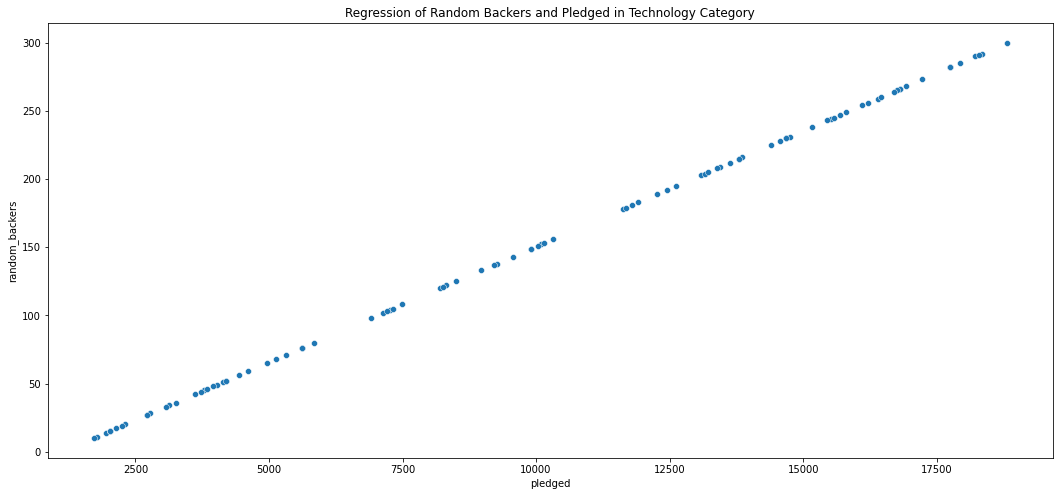

In [23]:
df_pledge_pred = pd.DataFrame({"pledged": pledged, "random_backers": random_backers})

fig = plt.gcf()

fig.set_size_inches(18, 8)

ax = sns.scatterplot(data=df_pledge_pred, x="pledged", y="random_backers")

plt.title("Regression of Random Backers and Pledged in Technology Category")

plt.show()

In [24]:
df_super = df_ks.loc[:, ["main_category", "goal", "pledged"]].dropna()
df_super_X = df_super.loc[:, ["main_category", "goal"]]
df_super_y = df_super.loc[:, "pledged"]

le_cat = LabelEncoder()

le_cat.fit(df_super_X["main_category"].values)
ss_goal = StandardScaler()
ss_pledged = StandardScaler()

ss_goal.fit(df_super_X["goal"].values.reshape(-1, 1))
ss_pledged.fit(df_super_y.values.reshape(-1, 1))

df_super_X["main_category"] = le_cat.transform(df_super_X["main_category"].values)
df_super_X["goal"] = ss_goal.transform(df_super_X["goal"].values.reshape(-1, 1))
df_super_y = ss_pledged.transform(df_super_y.values.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(df_super_X, df_super_y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(283995, 2) (94666, 2) (283995, 1) (94666, 1)


In [25]:
estimator = SGDRegressor()
para_grids = {
            "loss" : ['squared_loss',  'squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
            "penalty" : ['l2', 'l1', 'elasticnet'],
            "alpha" : [0.000001, 0.0001, 0.1],
            "random_state": [random.randint(10, 100), random.randint(200, 400), random.randint(600, 1000)]
        }


grid = GridSearchCV(estimator, para_grids, scoring='neg_median_absolute_error')
grid.fit(X_train, y_train.ravel())
sgdr = grid.best_estimator_

reg_prediction=sgdr.predict(X_test)

print(grid.best_score_, grid.best_params_)

mae = mean_absolute_error(y_test, reg_prediction)

mae

-0.02935301746703174 {'alpha': 0.1, 'loss': 'huber', 'penalty': 'l1', 'random_state': 757}


0.10286055167336744

In [36]:
estimator = RandomForestRegressor(random_state=420)
para_grids = {
            "n_estimators" : [10,50,100],
            "max_features" : ["auto", "log2", "sqrt"],
            "bootstrap"    : [True, False]
        }


grid = GridSearchCV(estimator, para_grids, scoring='neg_median_absolute_error')
grid.fit(X_train, y_train.ravel())
forest = grid.best_estimator_

reg_prediction=forest.predict(X_test)

print(grid.best_score_, grid.best_params_)

mae = mean_absolute_error(y_test, reg_prediction)

mae

-0.031302160790604425 {'bootstrap': False, 'max_features': 'auto', 'n_estimators': 10}


0.13908038946365728

[17.]
[765.5]
[9986.08]
[7828.]
[1420.]
[1200.]
[9408.425]
[5205.]
[1.]
[65.]
[161.]
[850.]
[15.]
[42991.307778]
[5.]
[17854.765137]
[9986.08]
[7828.]
[525.]
[2832.]
[20955.]
[265.]
[4305.]
[6.]
[9165.274444]
[5899.]
[14220.75]
[1871.]
[27685.]
[355.41]
[20330.]
[92.5]
[120.]
[5445.96]
[-1.818989e-12]
[517.]
[55.]
[27604.]
[5787.061538]
[3456.]
[9986.08]
[2358.857143]
[275.]
[13690.677778]
[-1.818989e-12]
[139846.]
[-1.818989e-12]
[5296.]
[135.]
[12873.679118]
[15803.]
[65.]
[130.]
[301.]
[-1.818989e-12]
[200.]
[200.]
[252.5]
[25.]
[3443.]
[2115.333333]
[7055.]
[1070.5]
[5345.]
[120.]
[2518.]
[1755.]
[2665.]
[17158.]
[985.]
[12827.]
[1774.]
[7615.875]
[5242.]
[5012.3]
[321.]
[88.]
[510.]
[11264.506875]
[196.25]
[-1.818989e-12]
[5059.]
[10.]
[12216.333333]
[9182.89]
[55.]
[-1.818989e-12]
[6476.5]
[2060.]
[18608.]
[-1.818989e-12]
[25.]
[-1.818989e-12]
[2185.888889]
[1449.]
[9986.08]
[1202.5]
[43486.333333]
[833.333333]
[48381.]


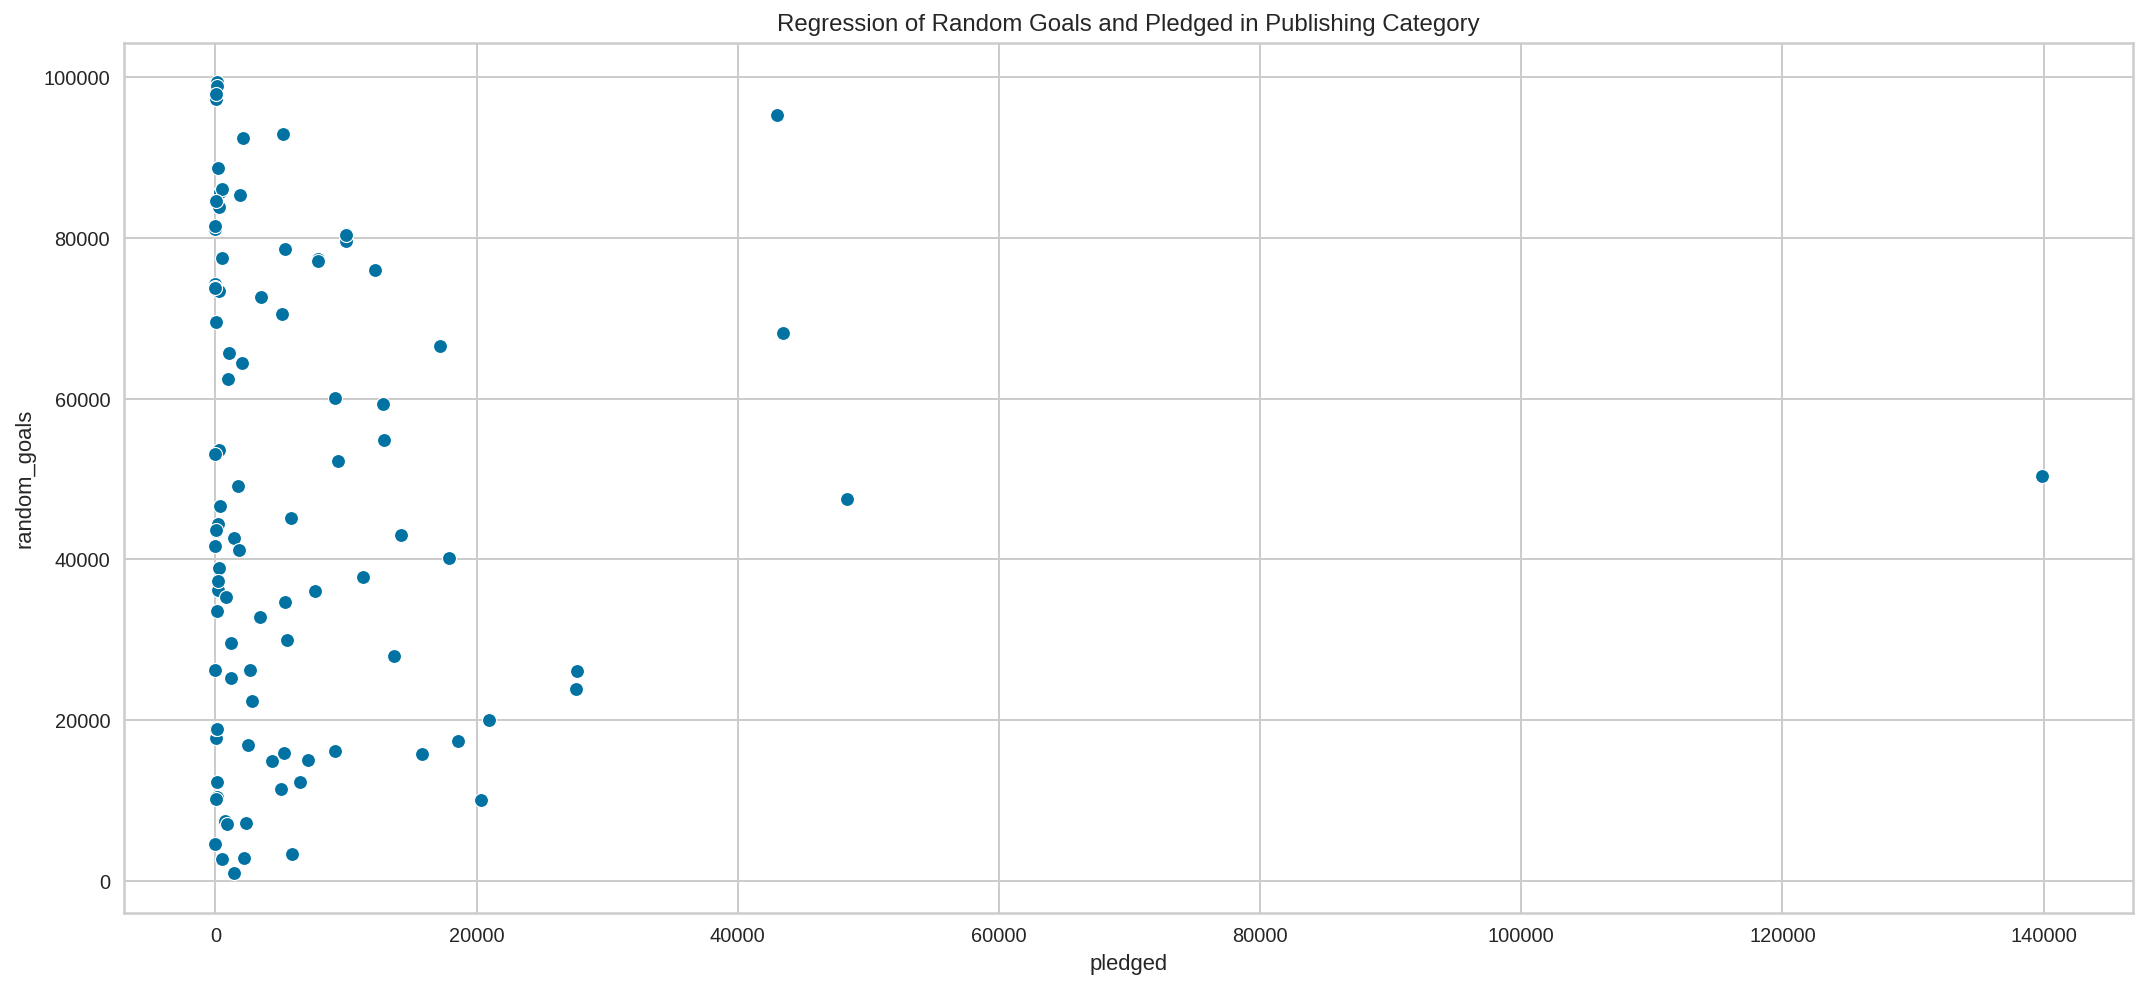

In [61]:
random_goals = []

for i in range(100):
  random_goals.append(random.randrange(1000, 100000))

rand_gl_ss = ss_goal.transform(np.array([random_goals]))
pledged = []

for goal in rand_gl_ss[0]:
  pred = forest.predict([[12, goal]])
  print(ss_pledged.inverse_transform(pred))
  pledged.append(ss_pledged.inverse_transform(pred)[0])

df_pledge_pred = pd.DataFrame({"pledged": pledged, "random_goals": random_goals})

fig = plt.gcf()

fig.set_size_inches(18, 8)

ax = sns.scatterplot(data=df_pledge_pred, x="pledged", y="random_goals")

plt.title("Regression of Random Goals and Pledged in Publishing Category")

plt.show()

In [55]:
text_model = markovify.Text(" ".join(list(df_ks["name"].astype(str).values)))

In [59]:
for i in range(10):
    print(text_model.make_sentence())

Fleas™ Mobile Game Art beyond the words Free From...
SmillustrationS Romo– The Smartphone Charger Survival Bracelet Wearable Loop The world... for my online store for people that have ADHD, Tourette, Autisme.
Ready to wear KaeleighBee has emerged and is going to end, dog?
UGDB: Change The World.
OUTLANDERS PHASE 2 The Legend Short Film, Fantasy and RPG book Theatrical Production Build Your Own Movement.
A Fun and Interactive Experience.
Doodler App: Learn to the next innovation in Back Pain Relief - BodyBloks!
Three Earthly Lives : a turn based strategy game.
CTR Clothing Line Stop the Flop on Your Terms Zen Motherfuckers - A 3D Boardgame with Flying Sail-Ship Miniatures The Tern Lamprey Boy the Game SUP RIG: A Stand Up Guy TILTS - second album Extending Out, encourage random acts of kindness.
The Vagine Regime: A Documentary on Refugees in the East Let's Build A Cidery!
